# Medical Cost Personal Insurance Project

# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.

# Columns

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict: Can you accurately predict insurance costs?

# Dataset Link

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor,StackingRegressor,VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,cross_val_score
from scipy.stats import zscore,boxcox

In [2]:
medcostdf=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\medical_cost_insurance.csv")
medcostdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medcostdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medcostdf.shape

(1338, 7)

In [5]:
medcostdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
medcostdf.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
medcostdf.duplicated().sum()

1

In [8]:
medcostdf.drop_duplicates(inplace=True)

In [9]:
medcostdf.shape

(1337, 7)

In [10]:
#Apply label encoder for categorical columns

le=LabelEncoder()

label=['sex','smoker','region']

for i in label:
    medcostdf[i]=le.fit_transform(medcostdf[i].astype(str))

In [11]:
medcostdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
medcostdf.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


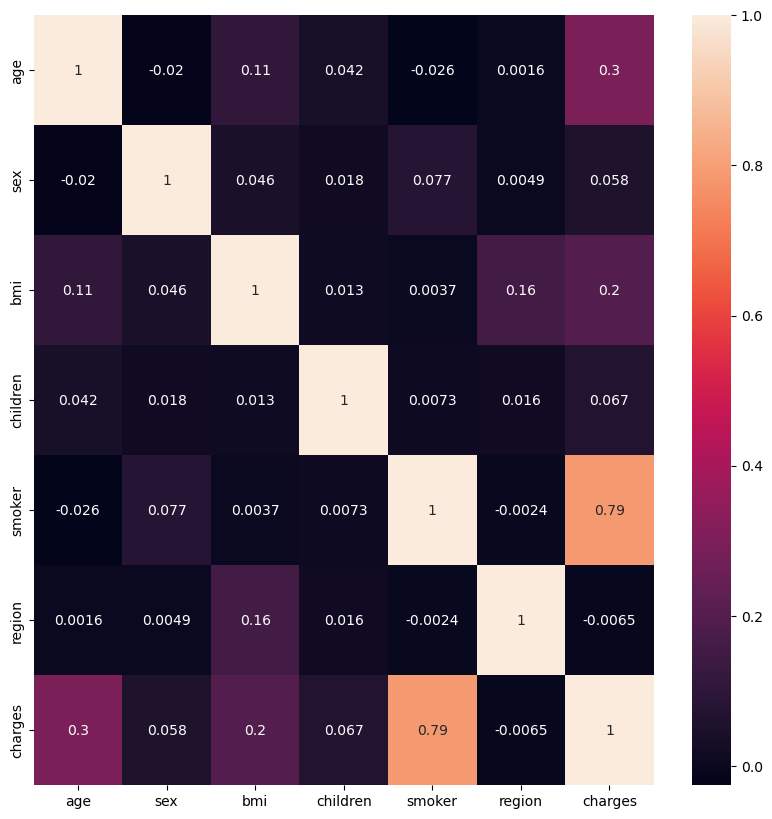

In [13]:
#check for correlation in the dataset

plt.figure(figsize=(10,10))
sns.heatmap(medcostdf.corr(),annot=True)
plt.show()

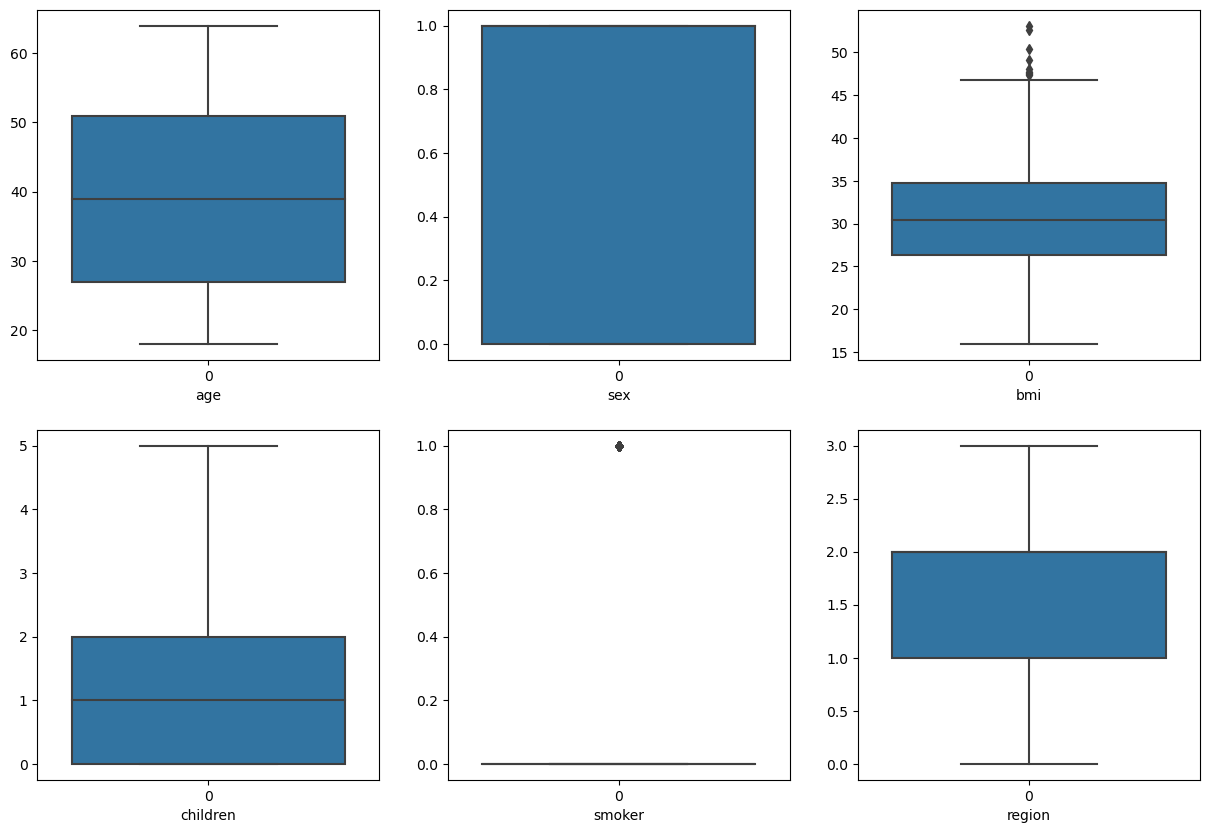

In [14]:
#check for the outliers in the dataset
plt.figure(figsize=(15,10))
p=1
for i in medcostdf:
    if p<=6:
        plt.subplot(2,3,p)
        sns.boxplot(medcostdf[i])
        plt.xlabel(i)
    p=p+1
plt.show()

In [15]:
z=np.abs(zscore(medcostdf))
z

,age,sex,bmi,children,smoker,region,charges
0,1.440418,1.009771,0.453160,0.909234,1.969660,1.343163,0.297857
1,1.511647,0.990324,0.509422,0.079442,0.507702,0.438017,0.954381
2,0.799350,0.990324,0.383155,1.580143,0.507702,0.438017,0.729373
3,0.443201,0.990324,1.305052,0.909234,0.507702,0.467128,0.719104
4,0.514431,0.990324,0.292456,0.909234,0.507702,0.467128,0.777499
...,...,...,...,...,...,...,...
1333,0.767704,0.990324,0.050269,1.580143,0.507702,0.467128,0.221263
1334,1.511647,1.009771,0.206053,0.909234,0.507702,1.372274,0.914695
1335,1.511647,1.009771,1.014490,0.909234,0.507702,0.438017,0.962287
1336,1.297958,1.009771,0.797524,0.909234,0.507702,1.343163,0.931054


In [16]:
np.where(z>=3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
        1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [17]:
meddf=medcostdf[(z<3).all(axis=1)]
meddf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
medcostdf.shape

(1337, 7)

In [19]:
meddf.shape

(1308, 7)

In [20]:
print("Data Loss Percentage",((medcostdf.shape[0]-meddf.shape[0])/medcostdf.shape[0])*100)

Data Loss Percentage 2.169035153328347


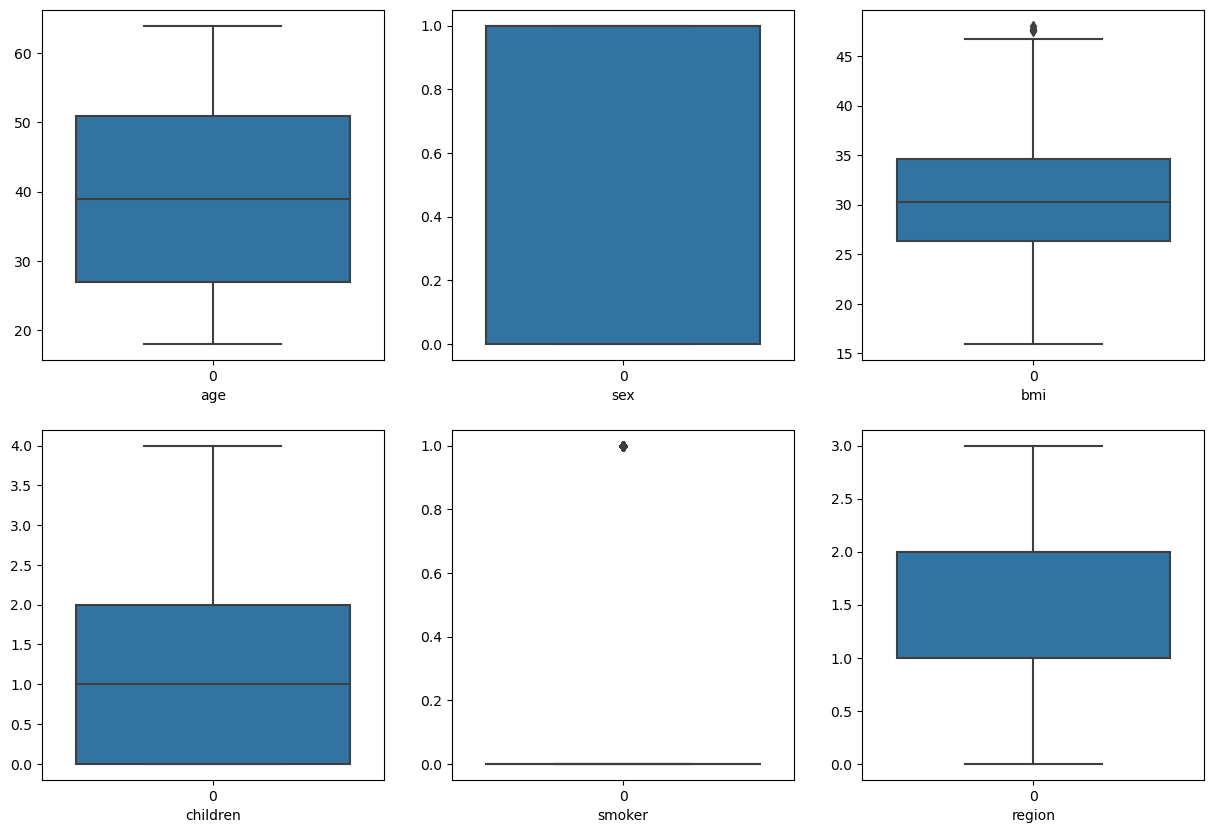

In [21]:
#check for the outliers in the dataset
plt.figure(figsize=(15,10))
p=1
for i in meddf:
    if p<=6:
        plt.subplot(2,3,p)
        sns.boxplot(meddf[i])
        plt.xlabel(i)
    p=p+1
plt.show()

In [22]:
#check for skewness in the dataset
meddf.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
charges     1.436653
dtype: float64

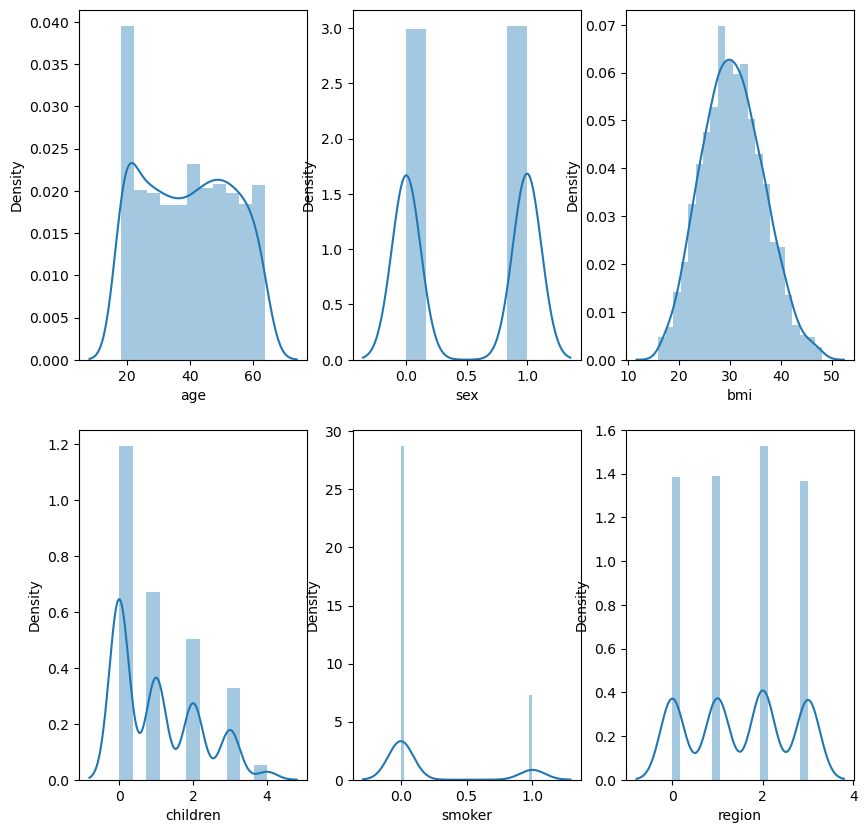

In [23]:
#check the distplot
plt.figure(figsize=(10,10))
p=1
for i in meddf:
    if p<=6:
        plt.subplot(2,3,p)
        sns.distplot(meddf[i])
        plt.xlabel(i)
    p=p+1
plt.show()

# Categorical plot shows the medical cost for personal insurance for different regions and sex (M -0 and F-1)

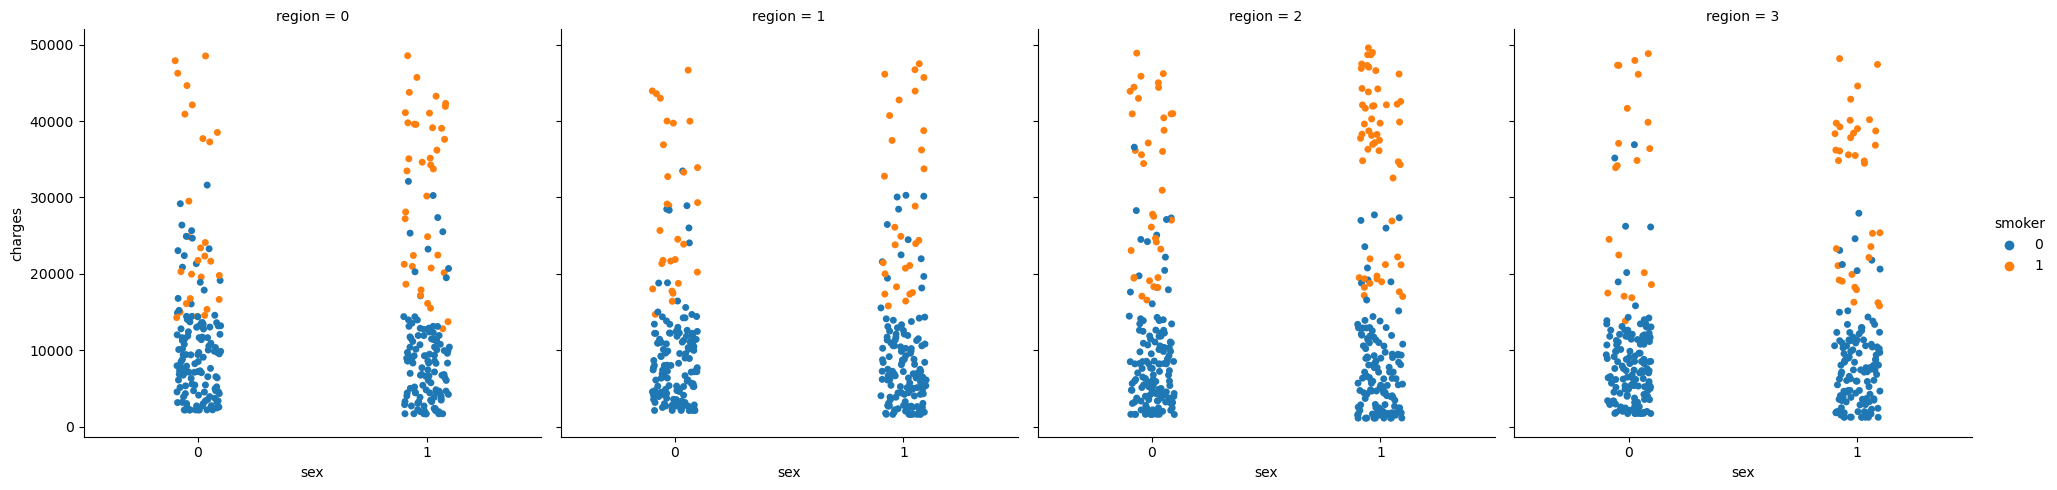

In [24]:
sns.catplot(meddf,x='sex',y='charges',hue='smoker',col='region')

# Stripplot shows the relationship between the medical insurance cost with sex (M,F) and smokers (0,1)

<Axes: xlabel='sex', ylabel='charges'>

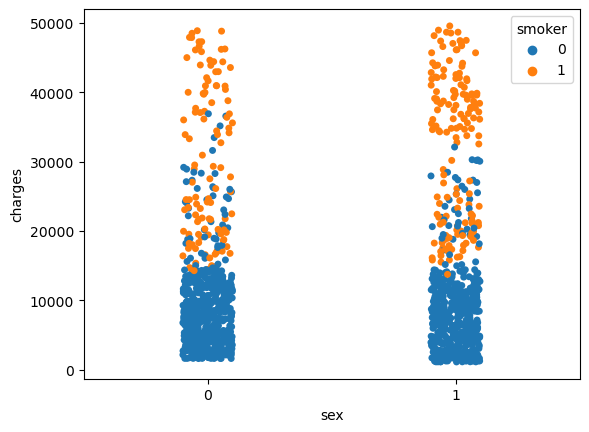

In [25]:
sns.stripplot(meddf,x='sex',y='charges',hue='smoker')

# Scatterplot shows the relationship between medical insurance cost and BMI with smokers

<Axes: xlabel='bmi', ylabel='charges'>

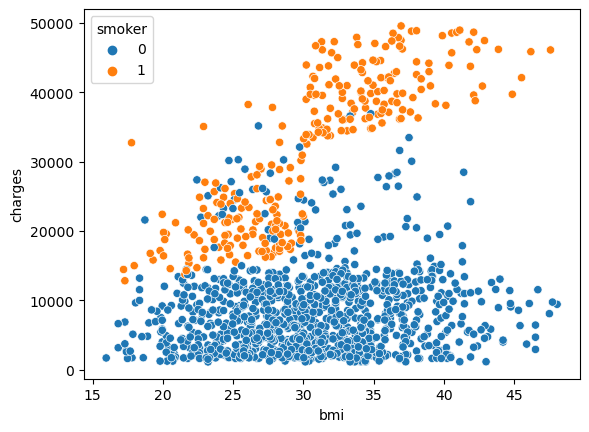

In [26]:
sns.scatterplot(meddf,x='bmi',y='charges',hue='smoker')

# Scatterplot shows the relationship between medical insurance cost and age with smokers

<Axes: xlabel='age', ylabel='charges'>

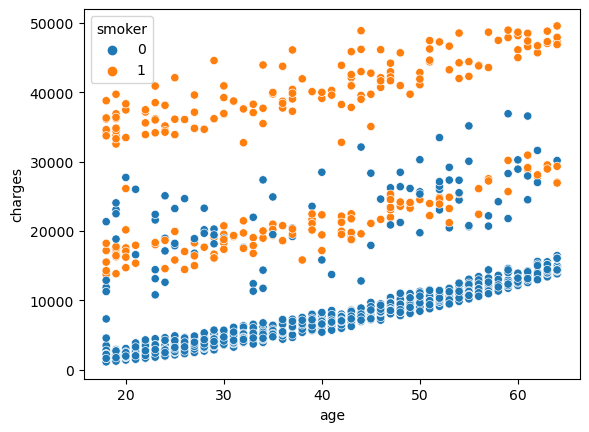

In [27]:
sns.scatterplot(meddf,x='age',y='charges',hue='smoker')

In [28]:
x=meddf.drop(columns="charges",axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [29]:
y=meddf["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [30]:
lr=LinearRegression()
ls=Lasso()
rg=Ridge()
dtr=DecisionTreeRegressor()
svr=SVR(kernel='rbf')
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
bag=BaggingRegressor()
extra=ExtraTreesRegressor()
ada=AdaBoostRegressor()

In [33]:
model=[lr,ls,rg,dtr,svr,rfr,gbr]

for i in model:
    cv=cross_val_score(i,x,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"\n",cv, "and mean of cross validation is",np.mean(cv))

Cross validation score for LinearRegression() 
 [0.7633674  0.71275448 0.77995497 0.73048268 0.7662308 ] and mean of cross validation is 0.7505580662519831
Cross validation score for Lasso() 
 [0.76338266 0.71277156 0.7799302  0.730497   0.76622424] and mean of cross validation is 0.7505611318690282
Cross validation score for Ridge() 
 [0.76339395 0.71285013 0.77939912 0.73095095 0.76604017] and mean of cross validation is 0.750526864572213
Cross validation score for DecisionTreeRegressor() 
 [0.77947087 0.65091095 0.63737729 0.7371971  0.65099317] and mean of cross validation is 0.6911898775549066
Cross validation score for SVR() 
 [-0.11467512 -0.11141436 -0.07285578 -0.09988027 -0.10697302] and mean of cross validation is -0.10115971090341214
Cross validation score for RandomForestRegressor() 
 [0.85372773 0.78532467 0.84807084 0.8283405  0.85418495] and mean of cross validation is 0.8339297360352701
Cross validation score for GradientBoostingRegressor() 
 [0.8766598  0.80623941 0.8

In [34]:
#get the best random state

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    gbr.fit(x_train,y_train)
    y_pred=gbr.predict(x_test)
    y_pred_train=gbr.predict(x_train)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy score for",maxacc,"and random state for",maxrs)

Accuracy score for 0.9107271346754924 and random state for 60


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=60)

In [36]:
x_train.shape

(915, 6)

In [37]:
x_test.shape

(393, 6)

In [38]:
y_train.shape

(915,)

In [39]:
y_test.shape

(393,)

In [40]:
model=[lr,ls,rg,dtr,svr,rfr,gbr,bag,extra,ada]

for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.predict(x_train)
    print("R Score for test data",i,r2_score(y_test,y_pred))
    print("R Score for training data",i,r2_score(y_train,y_pred_train))
    print("Mean Squared Error for test data",i,mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error for test data",i,mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error for test data",i,np.sqrt(mean_squared_error(y_test,y_pred)),"\n")

R Score for test data LinearRegression() 0.807557745924143
R Score for training data LinearRegression() 0.7269499328673144
Mean Squared Error for test data LinearRegression() 27803465.797940582
Mean Absolute Error for test data LinearRegression() 3767.1965268803997
Root Mean Squared Error for test data LinearRegression() 5272.899183365882 

R Score for test data Lasso() 0.8075347695610693
R Score for training data Lasso() 0.7269498512187731
Mean Squared Error for test data Lasso() 27806785.352307398
Mean Absolute Error for test data Lasso() 3767.7530552254734
Root Mean Squared Error for test data Lasso() 5273.213949035958 

R Score for test data Ridge() 0.8068304506615003
R Score for training data Ridge() 0.7269221467562881
Mean Squared Error for test data Ridge() 27908543.183658164
Mean Absolute Error for test data Ridge() 3784.234382985699
Root Mean Squared Error for test data Ridge() 5282.85369697649 

R Score for test data DecisionTreeRegressor() 0.7738304863313273
R Score for trai

In [41]:
#Applying Regularization technique to improve the performance of the model hyperparamter tuning for GradientBoostingRegressor

grid_param={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error'],'max_features':['auto', 'sqrt', 'log2']}

In [42]:
gs=GridSearchCV(gbr,grid_param,cv=5,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [43]:
gs.best_params_

{'criterion': 'squared_error', 'loss': 'huber', 'max_features': 'log2'}

In [44]:
gbr1=GradientBoostingRegressor(criterion='squared_error',loss='huber',max_features='log2')
gbr1.fit(x_train,y_train)
y_pred1=gbr1.predict(x_test)
print(r2_score(y_test,y_pred1))

0.9170572727684948


In [45]:
#saving the best model
import pickle
file='medcostinsurance.pkl'
pickle.dump(gbr1,open(file,'wb'))

In [46]:
#load the file
import pickle
result=pickle.load(open('medcostinsurance.pkl','rb'))
result.score(x_test,y_test)

0.9170572727684948

In [47]:
#save the output in dataframe
output=pd.DataFrame([result.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
output

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
Predicted,7863.348008,1084.513502,34540.266829,19805.694653,5618.186229,9179.496893,23302.907029,3908.760886,41087.685282,2455.784216,...,2472.693717,5181.053262,15779.786157,11782.873583,2318.562743,12418.767672,3094.404946,13661.99614,4886.131828,5517.615696
Actual,7337.748000,1625.433750,34472.841000,20745.989100,4189.113100,28340.188850,21978.676900,3410.324000,42211.138200,2134.901500,...,1719.436300,5245.226900,14119.620000,10959.694700,2585.850650,12479.708950,3176.287700,12950.07120,5209.578850,18804.752400
